In [68]:
import csv
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error as MSLE
random.seed(123)
plt.rcParams["font.sans-serif"]=["SimHei"]
from datetime import datetime
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns
path = r"C:\Users\user\Desktop\ETC"

In [69]:
acc_1_fin=pd.read_csv(path+r"/acc_1_fin.csv")
print(acc_1_fin.columns)
print(acc_1_fin.shape)

Index(['Unnamed: 0', '回堵情況', '總通行量', '總平均車速', '里程數', '速限', '24小時內死亡人數',
       '2-30日內死亡人數', '受傷人數', '事故涉及車輛數',
       ...
       '肇因研判(子)_22', '肇因研判(子)_23', '肇因研判(子)_24', '肇因研判(子)_25', '肇因研判(子)_26',
       '肇因研判(子)_27', '肇因研判(子)_28', '是否為連續假日_1', '是否為假日_1', '處理時間'],
      dtype='object', length=281)
(7252, 281)


In [70]:
X1 = acc_1_fin.drop("處理時間",axis = 1)
y1 = acc_1_fin["處理時間"]

In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2) # 0.2 test_size means 20%

##  Ridge

In [82]:
# Ridge交叉检验 cv=10
n_alphas = 1000
alphas = np.linspace(190, 250, n_alphas)

ridgecv_1 = RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,gcv_mode=None,scoring ='neg_mean_squared_error',
                    store_cv_values=True)
ridgecv_1.fit(X1_train, y1_train)

RidgeCV(alphas=array([190.        , 190.06006006, 190.12012012, 190.18018018,
       190.24024024, 190.3003003 , 190.36036036, 190.42042042,
       190.48048048, 190.54054054, 190.6006006 , 190.66066066,
       190.72072072, 190.78078078, 190.84084084, 190.9009009 ,
       190.96096096, 191.02102102, 191.08108108, 191.14114114,
       191.2012012 , 191.26126126, 191.32132132, 191.38138138,
       191.44144144, 191.5015015 , 191...
       248.85885886, 248.91891892, 248.97897898, 249.03903904,
       249.0990991 , 249.15915916, 249.21921922, 249.27927928,
       249.33933934, 249.3993994 , 249.45945946, 249.51951952,
       249.57957958, 249.63963964, 249.6996997 , 249.75975976,
       249.81981982, 249.87987988, 249.93993994, 250.        ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=True)

In [83]:
ridgecv_1_best_alpha = ridgecv_1.alpha_
print('最佳的alpha : ',ridgecv_1_best_alpha)
print('估計係數個數 : ',len(ridgecv_1.coef_ ))
print('非0的係數個數 : ',np.sum(ridgecv_1.coef_ != 0))
#print("系数：",lassocv_1.coef_)

最佳的alpha :  199.78978978978978
估計係數個數 :  280
非0的係數個數 :  270


In [84]:
# train model
ridge_1=Ridge(alpha =  ridgecv_1.alpha_ , max_iter = 50000 , tol = 0.0001 , normalize=False)
ridge_1.fit(X1_train,y1_train)

#prediction
ridge_1_pred=ridge_1.predict(X1_test)
ridge_1_pred=ridge_1_pred.flatten()

# msle
#print(MSLE(y1_test,ridge_1_pred))

# rmse
print(np.sqrt(mean_squared_error(y1_test,ridge_1_pred)))
# mse
print(mean_squared_error(y1_test,ridge_1_pred))

# r2
print(metrics.r2_score(y1_test,ridge_1_pred))

14.214346321795249
202.0476413559341
0.2769938631493737


## 係數視覺化

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


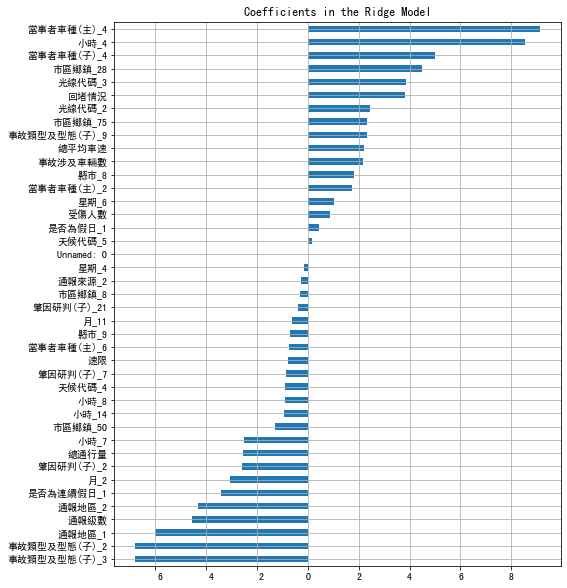

In [58]:
# 前20 後20 ()
coef = pd.Series( ridgecv_1.coef_, index = X1_train.columns)
imp_coef = pd.concat([coef.sort_values().head(20), coef.sort_values().tail(21)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh",grid=True)
plt.title("Coefficients in the Ridge Model")
plt.show()

## Dimension Reduction BY Ridge

In [123]:
variable_select_varname=acc_1_fin.columns[np.where(ridgecv_1.coef_!=0)]

In [126]:
variable_select_varname

Index(['Unnamed: 0', '回堵情況', '總通行量', '總平均車速', '里程數', '速限', '受傷人數', '事故涉及車輛數',
       '通報級數', '通報地區_0', '向車道_0', '向車道_1', '通報來源_0', '縣市_8', '市區鄉鎮_8',
       '市區鄉鎮_28', '市區鄉鎮_50', '市區鄉鎮_75', '月_0', '月_2', '月_3', '月_9', '月_11',
       '星期_6', '小時_4', '小時_7', '小時_8', '小時_14', '天候代碼_4', '天候代碼_5', '光線代碼_0',
       '事故位置(主)_0', '事故類型及型態(子)_2', '事故類型及型態(子)_3', '事故類型及型態(子)_9',
       '當事者車種(主)_2', '當事者車種(主)_4', '當事者車種(主)_6', '肇因研判(主)_0', '肇因研判(子)_2',
       '肇因研判(子)_7', '是否為連續假日_0', '是否為連續假日_1', '是否為假日_0'],
      dtype='object')